Suppose we collect $n$ independent observations for a response variable and $p$ explanatory variables, say $y \in R^n$ and $X \in R^{n\times p}$. Let $\epsilon_1, \ldots, \epsilon_n$ be i.i.d zero-mean random noises and $\epsilon = (\epsilon_1, \ldots, \epsilon_n)$, the linear model has a form:

$$y=X \beta^{*} +\epsilon.$$

First, we need to define a objective function as the optimization objective. 

In [71]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
from scope import ScopeSolver

import warnings
warnings.filterwarnings('ignore')

In [72]:
n, p = 500, 100
rng = np.random.default_rng(0)
X = rng.normal(0, 1, (n, p))
X = np.hstack([np.ones((n, 1)), X])
print(X.shape)
beta = np.zeros(p+1)
beta[:4] = [5, 4, 3, 2]
y = X @ beta + rng.normal(0, 1, n)

(500, 101)


In [73]:
EXPECTILE = 0.99
def asym_loss(params):
    diff = y - X @ params
    weight = jnp.where(diff < 0, 1 - EXPECTILE, EXPECTILE)
    loss = jnp.mean(weight * (diff**2))
    return loss

solver = ScopeSolver(p+1, sparsity=3, always_select=[0])
params = solver.solve(asym_loss)
print("Exact recovery: {}, and selected variables:".format(np.all(np.nonzero(params)[0] == np.nonzero(beta)[0])), 
      np.nonzero(params)[0])

Exact recovery: False, and selected variables: [0 1 2]


In [74]:
def ols_loss(params):
    loss = jnp.mean((y - X @ params)**2)
    return loss

solver = ScopeSolver(p+1, sparsity=3, always_select=[0])
params_ols = solver.solve(ols_loss)
print("Exact recovery: {}, and selected variables:".format(np.all(np.nonzero(params_ols) == np.nonzero(beta))), 
      np.nonzero(params_ols)[0])

Exact recovery: False, and selected variables: [0 1 2]


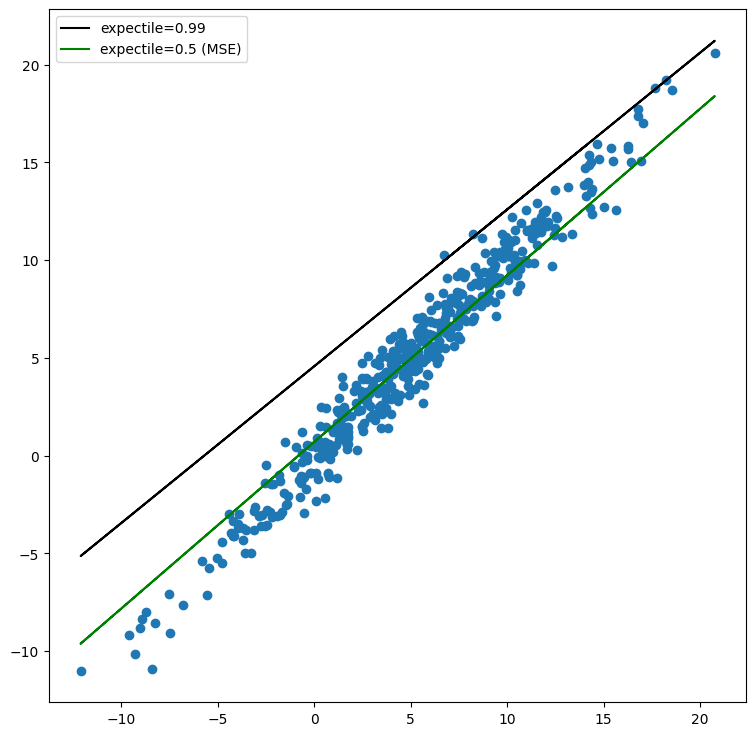

In [75]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (9, 9))
b, a = np.polyfit(X @ beta, X @ params, deg=1)
b_ols, a_ols = np.polyfit(X @ beta, X @ params_ols, deg=1)
ax.scatter(X @ beta, y)
ax.plot(X @ beta, a + b * (X @ beta), color="k", lw=1.5, label='expectile=0.99')
ax.plot(X @ beta, a_ols + b_ols * (X @ beta), color="g", lw=1.5, label='expectile=0.5 (MSE)')
ax.legend()